# Aufgabe 2: Multi-Class Perceptrons

In [450]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [451]:
X, y = make_blobs(n_samples=50, centers=3, cluster_std=0.2,n_features=2,center_box=(1,5),random_state=104)

In [452]:
y

array([0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 1, 0, 1])

In [453]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

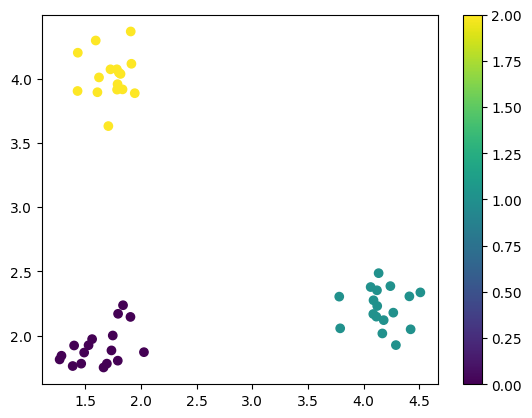

In [454]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

### draw Percepton layout
* Hint: now we have more then one Perceptron
* write math. formulation as linear model

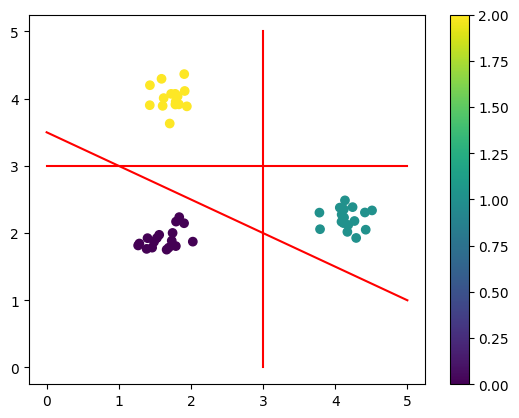

In [455]:
plt.scatter(X[:,0],X[:,1],c=y)


line1x= np.arange(0,6)
line1y= lambda x: (x * -0.5) +3.5

line2x = np.arange(0,6)
line2y = lambda x: (x * (0)) + 3

plt.plot(line1x,line1y(line1x), 'r-')
plt.plot(line2x,line2y(line1x), 'r-')
plt.plot(line2y(line1x),line2x, 'r-')
plt.plot()
plt.colorbar()

### Transform lables to one-hot coding
* Hint: Use Scikit-Learn

In [456]:
from sklearn.preprocessing import OneHotEncoder

In [457]:
y

array([0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       1, 0, 0, 1, 0, 1])

In [458]:
y.reshape(-1,1)

array([[0],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [0],
       [2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [2],
       [0],
       [0],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [0],
       [2],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1]])

In [459]:
onehot = OneHotEncoder()
y_one = onehot.fit_transform(y.reshape(-1,1)).toarray()
y_one



array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1

In [460]:
y_one=(y_one*2-1)

y_one

array([[ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1., -1.

### Manually find parameters $w$ and $b$ for
* for each Perceptron seperately
* then combine to single matrix multiplication formulation

In [461]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

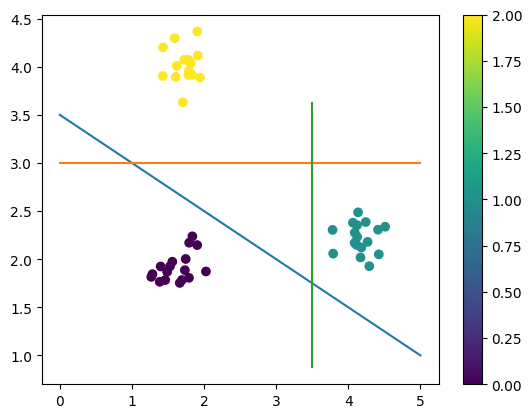

In [462]:
fig, ax1 = plt.subplots()




w1 = np.array([0.5,1])
b1 = (-3.5)


w2 = np.array([0,1])
b2 = (-3)


w3 = np.array([1,0])
b3 = (-3.5)



line1 = plot_line_from_normal_vector_and_offset(w1,b1,x_range= [0,5], ax= ax1)
line2 = plot_line_from_normal_vector_and_offset(w2,b2,x_range= [0,5], ax= ax1)
line3 = plot_line_from_normal_vector_and_offset(w3,b3,x_range= [0,5], ax= ax1)

plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

#### test single perceptrons by class


In [463]:
#use first train sample
w1.dot(X[1,:].T)+b1

np.float64(0.910685795443845)

In [464]:
#or
X[1,:].dot(w1)+b1

np.float64(0.910685795443845)

In [465]:
# check for all train samples if sign(y)==sign(wx+b)
i=1
print (y[i],np.sign(w1.dot(X[i,:].T)+b1))
y[i]==np.sign(w1.dot(X[i,:].T)+b1)

1 1.0


np.True_

In [466]:
w1.dot(X.T)+b1

array([-0.74588419,  0.9106858 ,  0.98339344,  0.45261912,  1.4341747 ,
        1.3196799 ,  1.01211796, -0.34346618,  1.1974218 ,  1.30609387,
       -0.98560318,  1.33246525, -0.40095602,  0.81321186,  0.82063814,
       -0.74685199, -1.04984017,  0.79280751,  1.05437071, -0.87013623,
        1.46300497,  1.00643835,  1.59196585,  0.69488331,  0.71175711,
        0.5727165 , -0.62497359,  0.70591097,  1.57136475,  0.71270758,
        1.11784243, -0.79806244, -1.04226915,  1.09236017,  1.4163396 ,
        1.44627217,  1.44353889, -0.61439586,  1.35764604, -0.43236253,
       -0.88625745,  1.35059199, -1.01266144,  1.81937326,  0.76162352,
       -0.80927706, -0.91487774,  0.60230105, -0.87628534,  0.91373152])

In [467]:
np.sign(w1.dot(X.T)+b1)

array([-1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.])

In [468]:
#check result
y==np.sign(w1.dot(X.T)+b1)

array([False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False,  True,
        True, False, False,  True, False,  True,  True,  True, False,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True])

In [469]:
y==np.sign(X.dot(w1.T)+b1)

array([False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False,  True,
        True, False, False,  True, False,  True,  True,  True, False,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True])

In [470]:
# get IDs of wrong classified
pos=np.where(y!=np.sign(w1.dot(X.T)+b1))
print(pos)

(array([ 0,  2,  4,  5,  7,  8,  9, 10, 11, 12, 15, 16, 19, 20, 22, 26, 28,
       30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48]),)


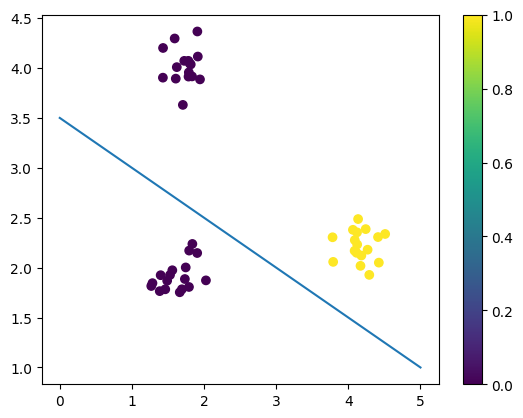

In [479]:
y_test=np.copy(y)
y_test[pos]=0
plot_line_from_normal_vector_and_offset(w1,b1,x_range= [0,5])
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()
#abline(1,2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)


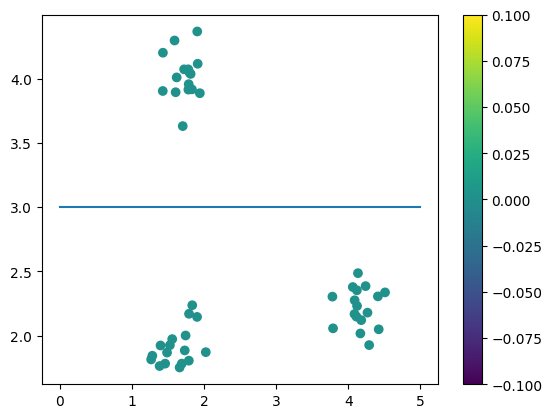

In [482]:
# get IDs of wrong classified
pos=np.where(y!=np.sign(w2.dot(X.T)+b2))
print(pos)
y_test=np.copy(y)
y_test[pos]= 0
plot_line_from_normal_vector_and_offset(w2,b2,x_range= [0,5])
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()
#abline(1,2)

In [484]:
# get IDs of wrong classified
pos=np.where(y_one!=np.sign(w3.dot(X.T)+b3))
print(pos)
y_test=np.copy(y_one)
y_test[pos]= 0
plot_line_from_normal_vector_and_offset(w2,b2,x_range= [0,5])
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()
#abline(1,2)

ValueError: operands could not be broadcast together with shapes (50,3) (50,) 

#### test full Setup

## Add non-linear activation / loss -> $softmax$
* implement a $softmax$ function
* replace $sgn$ by $softmax$
* plot confidence of the test samples

In [474]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""

    return